# Cyclists classification : DataManagement & Modélisation

<div class="alert-warning">
<font color='black'>
L'intérêt de cet article est de présenter une segmentation de coureurs cyclistes à partir de leurs caractéristiques renseignées dans un jeu vidéo.
<br>
<br>
L'idée consiste alors à importer ces données récupérées au sein de l'éditeur du jeu vidéo, puis à manipuler ces données à travers différentes étapes (statistiques descriptives, indicateurs etc...) en vue d'établir des groupes homogènes de coureurs.
<br>
<br>    
Le résultat attendu consiste en l'obtention de ces groupes homogènes ("segments") partageant les mêmes caractéristiques malgré l'hétérogénéité de ces individus dans le jeu vidéo.
<br>
<br>
De telle sorte à reproduire des segments proches de la réalité et le réalisme des coureurs composant chacun de ces groupes.
<font color='black'>


## 0. Paramétrage

### 0.1 / Chargements des différents packages

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from datetime import date

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics, neighbors
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, neighbors

from sklearn import preprocessing

### 0.2 / Automatisation des dates

In [2]:
DTJ=date.today()
print(DTJ)

current_year = DTJ.strftime("%Y")
print("Année actuelle =", current_year)

2025-02-20
Année actuelle = 2025
2025-02-20
Année actuelle = 2025


### 0.3 / Chemins de travail

In [3]:
# Connaître l'emplacement de base
os.getcwd()

'C:\\Users\\gaeta\\Documents\\03_ PYTHON\\14_PROJET_PCM\\01_NOTEBOOK'

'C:\\Users\\gaeta\\Documents\\03_ PYTHON\\14_PROJET_PCM\\01_NOTEBOOK'

In [4]:
# Emplacements de travail
path="C:/Users/gaeta/Documents/03_ PYTHON/14_PROJET_PCM/02_INPUTS"
results="C:/Users/gaeta/Documents/03_ PYTHON/14_PROJET_PCM/03_OUTPUTS"
os.chdir(path)
print(path)
print(results)

C:/Users/gaeta/Documents/03_ PYTHON/14_PROJET_PCM/02_INPUTS
C:/Users/gaeta/Documents/03_ PYTHON/14_PROJET_PCM/03_OUTPUTS
C:/Users/gaeta/Documents/03_ PYTHON/14_PROJET_PCM/02_INPUTS
C:/Users/gaeta/Documents/03_ PYTHON/14_PROJET_PCM/03_OUTPUTS


## 1. Imports des différents fichiers

### 1.1 / Cyclistes

In [5]:
cyclists=pd.read_excel(path+"/_20230301_inputs_projet_pcm.xlsx",sheet_name="CYCLISTS")
print(cyclists["Date_de_naissance"].dtypes)
cyclists.head()

datetime64[ns]
datetime64[ns]


,IDcyclist,Nom,Prenom,Prenom_nom,ID_team,fklDregion,ID_contrat,fklDNextcontract,gene_sz_photo,Date_de_naissance,...,value_i_yearneopro,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,gene_i_nb_vuelta,gene_i_nb_sanremo,gene_i_nb_flandres,gene_i_nb_roubaix,gene_i_nb_liege,gene_i_nb_lombardia
0,2,Zeits,Andrey,Zeits A.,Astana Qazaqstan Team,KAZ,0,0,azeits,1986-12-14,...,2008,1,2,9,8,0,0,0,0,4
1,3,Valverde,Alejandro,Valverde A.,Movistar Team,Region_de_Murcia,0,0,avalverde,1980-04-25,...,2002,130,14,1,15,7,1,0,15,10
2,4,Madouas,Valentin,Madouas V.,Groupama - FDJ,Bretagne,0,0,vmadouas,1996-07-12,...,2017,2,2,1,0,0,2,0,4,1
3,5,Seigle,Romain,Seigle R.,-,Poitou-Charentes,0,0,rseigle,1994-10-11,...,2018,0,0,1,2,0,0,0,4,1
4,16,Mollema,Bauke,Mollema B.,Trek - Segafredo,Groningue,0,0,bmollema,1986-11-26,...,2008,17,11,4,4,1,0,0,8,13


,IDcyclist,Nom,Prenom,Prenom_nom,ID_team,fklDregion,ID_contrat,fklDNextcontract,gene_sz_photo,Date_de_naissance,...,value_i_yearneopro,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,gene_i_nb_vuelta,gene_i_nb_sanremo,gene_i_nb_flandres,gene_i_nb_roubaix,gene_i_nb_liege,gene_i_nb_lombardia
0,2,Zeits,Andrey,Zeits A.,Astana Qazaqstan Team,KAZ,0,0,azeits,1986-12-14,...,2008,1,2,9,8,0,0,0,0,4
1,3,Valverde,Alejandro,Valverde A.,Movistar Team,Region_de_Murcia,0,0,avalverde,1980-04-25,...,2002,130,14,1,15,7,1,0,15,10
2,4,Madouas,Valentin,Madouas V.,Groupama - FDJ,Bretagne,0,0,vmadouas,1996-07-12,...,2017,2,2,1,0,0,2,0,4,1
3,5,Seigle,Romain,Seigle R.,-,Poitou-Charentes,0,0,rseigle,1994-10-11,...,2018,0,0,1,2,0,0,0,4,1
4,16,Mollema,Bauke,Mollema B.,Trek - Segafredo,Groningue,0,0,bmollema,1986-11-26,...,2008,17,11,4,4,1,0,0,8,13


### 1.2 / Teams

In [6]:
teams=pd.read_excel(path+"/_20230301_inputs_projet_pcm.xlsx",sheet_name="TEAMS")
teams.head()

,Idteam,Nom_court,Nom_team,fklDsponsor,gene_b_licensed,ID_country,adresse_mail_equipe,Nom_manageur_general,ID_division
0,1,Movistar,Movistar Team,Movistar,True,ESP,movistar.com,Eusebio Unzue,GS1
1,2,INEOS Grenadiers,INEOS Grenadiers,INEOS Grenadiers,True,GBR,team-ineos.com,Dave Brailsford,GS1
2,3,AG2R Citroën,AG2R Citroën Team,AG2R Citroën,True,FRA,ag2r-citroen.fr,Vincent Lavenu,GS1
3,5,EF-EasyPost,EF Education-EasyPost,EF Education-EasyPost,True,USA,ef-easypost.com,Jonathan Vaughters,GS1
4,6,Groupama - FDJ,Groupama - FDJ,Groupama - FDJ,True,FRA,groupama-fdj.fr,Marc Madiot,GS1


,Idteam,Nom_court,Nom_team,fklDsponsor,gene_b_licensed,ID_country,adresse_mail_equipe,Nom_manageur_general,ID_division
0,1,Movistar,Movistar Team,Movistar,True,ESP,movistar.com,Eusebio Unzue,GS1
1,2,INEOS Grenadiers,INEOS Grenadiers,INEOS Grenadiers,True,GBR,team-ineos.com,Dave Brailsford,GS1
2,3,AG2R Citroën,AG2R Citroën Team,AG2R Citroën,True,FRA,ag2r-citroen.fr,Vincent Lavenu,GS1
3,5,EF-EasyPost,EF Education-EasyPost,EF Education-EasyPost,True,USA,ef-easypost.com,Jonathan Vaughters,GS1
4,6,Groupama - FDJ,Groupama - FDJ,Groupama - FDJ,True,FRA,groupama-fdj.fr,Marc Madiot,GS1


### 1.3 / Référentiel pays

In [7]:
ref_pays=pd.read_excel(path+"/_20230301_referentiel_pays.xlsx",sheet_name="Feuil1")
ref_pays.head()

,Region,Pays
0,KAZ,KAZ
1,Region_de_Murcia,ESP
2,Bretagne,FRA
3,Poitou-Charentes,FRA
4,Groningue,NLD


,Region,Pays
0,KAZ,KAZ
1,Region_de_Murcia,ESP
2,Bretagne,FRA
3,Poitou-Charentes,FRA
4,Groningue,NLD


## 2. DataManagement

### 2.1 / Conservation des colonnes de travail de la table CYCLISTS

In [8]:
# On restreint le nombre de colonnes traitées
cyclists=cyclists[['IDcyclist','Nom','Prenom','ID_team','fklDregion','Date_de_naissance','Popularite','value_f_potentiel','taille_coureur','poids_coureur','carac_plaine','carac_montagne','carac_descente','carac_paves','carac_clm','carac_prologue','carac_sprint','carac_acceleration','carac_endurance','carac_resistance','carac_recuperation','carac_vallon','carac_baroudeur','prendra_sa_retraite','Coureur_champion','gene_ilist_flkDfavorite_races','value_i_yearneopro','gene_i_nb_victory','gene_i_nb_tdf','gene_i_nb_giro','gene_i_nb_vuelta','gene_i_nb_sanremo','gene_i_nb_flandres','gene_i_nb_roubaix','gene_i_nb_liege','gene_i_nb_lombardia']]

# Calcul du niveau moyen par coureur
cyclists["carac_moy"]=round(((cyclists['carac_plaine'] + cyclists['carac_montagne'] + cyclists['carac_descente'] +
cyclists['carac_paves'] + cyclists['carac_clm'] + cyclists['carac_prologue'] + cyclists['carac_sprint'] +
cyclists['carac_acceleration'] + cyclists['carac_endurance'] + cyclists['carac_resistance'] + 
cyclists['carac_recuperation'] + cyclists['carac_vallon'] + cyclists['carac_baroudeur'])/(13)),2)
cyclists.head()

,IDcyclist,Nom,Prenom,ID_team,fklDregion,Date_de_naissance,Popularite,value_f_potentiel,taille_coureur,poids_coureur,...,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,gene_i_nb_vuelta,gene_i_nb_sanremo,gene_i_nb_flandres,gene_i_nb_roubaix,gene_i_nb_liege,gene_i_nb_lombardia,carac_moy
0,2,Zeits,Andrey,Astana Qazaqstan Team,KAZ,1986-12-14,17.0,3.5,177,69,...,1,2,9,8,0,0,0,0,4,66.38
1,3,Valverde,Alejandro,Movistar Team,Region_de_Murcia,1980-04-25,83.0,5.5,177,61,...,130,14,1,15,7,1,0,15,10,73.08
2,4,Madouas,Valentin,Groupama - FDJ,Bretagne,1996-07-12,0.0,5.5,178,71,...,2,2,1,0,0,2,0,4,1,72.38
3,5,Seigle,Romain,-,Poitou-Charentes,1994-10-11,0.0,4.0,169,63,...,0,0,1,2,0,0,0,4,1,65.54
4,16,Mollema,Bauke,Trek - Segafredo,Groningue,1986-11-26,63.0,5.5,184,66,...,17,11,4,4,1,0,0,8,13,73.69


,IDcyclist,Nom,Prenom,ID_team,fklDregion,Date_de_naissance,Popularite,value_f_potentiel,taille_coureur,poids_coureur,...,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,gene_i_nb_vuelta,gene_i_nb_sanremo,gene_i_nb_flandres,gene_i_nb_roubaix,gene_i_nb_liege,gene_i_nb_lombardia,carac_moy
0,2,Zeits,Andrey,Astana Qazaqstan Team,KAZ,1986-12-14,17.0,3.5,177,69,...,1,2,9,8,0,0,0,0,4,66.38
1,3,Valverde,Alejandro,Movistar Team,Region_de_Murcia,1980-04-25,83.0,5.5,177,61,...,130,14,1,15,7,1,0,15,10,73.08
2,4,Madouas,Valentin,Groupama - FDJ,Bretagne,1996-07-12,0.0,5.5,178,71,...,2,2,1,0,0,2,0,4,1,72.38
3,5,Seigle,Romain,-,Poitou-Charentes,1994-10-11,0.0,4.0,169,63,...,0,0,1,2,0,0,0,4,1,65.54
4,16,Mollema,Bauke,Trek - Segafredo,Groningue,1986-11-26,63.0,5.5,184,66,...,17,11,4,4,1,0,0,8,13,73.69


### 2.2 / Premiers éléments stylisés

In [9]:
list_col_cyclists=list(cyclists.columns)
print(list_col_cyclists)
print("\n")
print(cyclists.shape)
print("\n")
print("La première colonne du dataframe est : " + list_col_cyclists[0])
print("\n")
print(str(cyclists["prendra_sa_retraite"].sum()) + " cyclistes prendront leur retraite à la fin de la saison")  

['IDcyclist', 'Nom', 'Prenom', 'ID_team', 'fklDregion', 'Date_de_naissance', 'Popularite', 'value_f_potentiel', 'taille_coureur', 'poids_coureur', 'carac_plaine', 'carac_montagne', 'carac_descente', 'carac_paves', 'carac_clm', 'carac_prologue', 'carac_sprint', 'carac_acceleration', 'carac_endurance', 'carac_resistance', 'carac_recuperation', 'carac_vallon', 'carac_baroudeur', 'prendra_sa_retraite', 'Coureur_champion', 'gene_ilist_flkDfavorite_races', 'value_i_yearneopro', 'gene_i_nb_victory', 'gene_i_nb_tdf', 'gene_i_nb_giro', 'gene_i_nb_vuelta', 'gene_i_nb_sanremo', 'gene_i_nb_flandres', 'gene_i_nb_roubaix', 'gene_i_nb_liege', 'gene_i_nb_lombardia', 'carac_moy']


(2212, 37)


La première colonne du dataframe est : IDcyclist


7 cyclistes prendront leur retraite à la fin de la saison
['IDcyclist', 'Nom', 'Prenom', 'ID_team', 'fklDregion', 'Date_de_naissance', 'Popularite', 'value_f_potentiel', 'taille_coureur', 'poids_coureur', 'carac_plaine', 'carac_montagne', 'carac_descente', 'cara

### Informations concernant les équipes et régions des coureurs

In [10]:
print(list(cyclists["ID_team"].unique()))
print("\n")
print("On comptabilise " + str(len(list(cyclists["ID_team"].unique()))) + " équipes distinctes")
print("\n")
print("\n")
print(list(cyclists["fklDregion"].unique()))
print("\n")
print("On comptabilise " + str(len(list(cyclists["fklDregion"].unique()))) + " régions distinctes")

['Astana Qazaqstan Team', 'Movistar Team', 'Groupama - FDJ', '-', 'Trek - Segafredo', 'Team Jumbo - Visma', 'EF Education-EasyPost', 'Israël - Premier Tech', 'Lotto Soudal', 'Bahrain Victorious', 'Intermarché-Wanty-Gobert Matériaux', 'AG2R Citroën Team', 'Burgos HD', 'Team TotalEnergies', 'Cycling Club Tavira', 'B&B HOTELS KTM', 'Euskaltel - Euskadi', 'Quick-Step - Alpha Vinyl', 'INEOS Grenadiers', 'Team Arkéa - Samsic', 'Andrina Giacomoli - Sadermac', 'Cofidis', 'Team BikeExchange - Jayco', 'UAE Team Emirates', 'Caja Rural - Seguros RGA', 'V25 - Porto', 'Eolo-Kometa Cycling Team', 'Team DSM', 'Radio Papa - Bavisto', 'Vismer ETS Team', 'Bardiani CSF Faizanè', 'St Michel - Auber 93', 'Human Powered Health', 'Alpecin-Deceuninck', 'Elkov - Kasper', 'BORA - hansgrohe', 'Go Sport - Roubaix Lille Métropole', 'Team Okyo', 'Mitoc - Solwatt', 'Beat Cycling', 'Team Nova Sudisk', 'Team Gourmetfestin - Simple', 'Team Volvaberg Qantic', 'Erappel', 'Bingoal - Pauwels Sauces - WB', 'Uno-X Pro Cycling

### 2.3 / Manipulations des champs date

In [11]:
cyclists["Age"] =(round((datetime.now() - cyclists["Date_de_naissance"]) / np.timedelta64(1, 'Y'),2)).astype(int)
cyclists["Annees_exp"]=int(current_year)-cyclists["value_i_yearneopro"]
cyclists.head()

,IDcyclist,Nom,Prenom,ID_team,fklDregion,Date_de_naissance,Popularite,value_f_potentiel,taille_coureur,poids_coureur,...,gene_i_nb_giro,gene_i_nb_vuelta,gene_i_nb_sanremo,gene_i_nb_flandres,gene_i_nb_roubaix,gene_i_nb_liege,gene_i_nb_lombardia,carac_moy,Age,Annees_exp
0,2,Zeits,Andrey,Astana Qazaqstan Team,KAZ,1986-12-14,17.0,3.5,177,69,...,9,8,0,0,0,0,4,66.38,38,17
1,3,Valverde,Alejandro,Movistar Team,Region_de_Murcia,1980-04-25,83.0,5.5,177,61,...,1,15,7,1,0,15,10,73.08,44,23
2,4,Madouas,Valentin,Groupama - FDJ,Bretagne,1996-07-12,0.0,5.5,178,71,...,1,0,0,2,0,4,1,72.38,28,8
3,5,Seigle,Romain,-,Poitou-Charentes,1994-10-11,0.0,4.0,169,63,...,1,2,0,0,0,4,1,65.54,30,7
4,16,Mollema,Bauke,Trek - Segafredo,Groningue,1986-11-26,63.0,5.5,184,66,...,4,4,1,0,0,8,13,73.69,38,17


,IDcyclist,Nom,Prenom,ID_team,fklDregion,Date_de_naissance,Popularite,value_f_potentiel,taille_coureur,poids_coureur,...,gene_i_nb_giro,gene_i_nb_vuelta,gene_i_nb_sanremo,gene_i_nb_flandres,gene_i_nb_roubaix,gene_i_nb_liege,gene_i_nb_lombardia,carac_moy,Age,Annees_exp
0,2,Zeits,Andrey,Astana Qazaqstan Team,KAZ,1986-12-14,17.0,3.5,177,69,...,9,8,0,0,0,0,4,66.38,38,17
1,3,Valverde,Alejandro,Movistar Team,Region_de_Murcia,1980-04-25,83.0,5.5,177,61,...,1,15,7,1,0,15,10,73.08,44,23
2,4,Madouas,Valentin,Groupama - FDJ,Bretagne,1996-07-12,0.0,5.5,178,71,...,1,0,0,2,0,4,1,72.38,28,8
3,5,Seigle,Romain,-,Poitou-Charentes,1994-10-11,0.0,4.0,169,63,...,1,2,0,0,0,4,1,65.54,30,7
4,16,Mollema,Bauke,Trek - Segafredo,Groningue,1986-11-26,63.0,5.5,184,66,...,4,4,1,0,0,8,13,73.69,38,17


### 2.4 / Caractéristiques des coureurs

#### Liste des colonnes "caractéristiques"

In [12]:
liste_col_caract=['carac_plaine', 'carac_montagne', 'carac_descente', 'carac_paves', 'carac_clm', 'carac_prologue', 'carac_sprint', 'carac_acceleration', 'carac_endurance', 'carac_resistance', 'carac_recuperation', 'carac_vallon', 'carac_baroudeur']
liste_col_caract

['carac_plaine',
 'carac_montagne',
 'carac_descente',
 'carac_paves',
 'carac_clm',
 'carac_prologue',
 'carac_sprint',
 'carac_acceleration',
 'carac_endurance',
 'carac_resistance',
 'carac_recuperation',
 'carac_vallon',
 'carac_baroudeur']

['carac_plaine',
 'carac_montagne',
 'carac_descente',
 'carac_paves',
 'carac_clm',
 'carac_prologue',
 'carac_sprint',
 'carac_acceleration',
 'carac_endurance',
 'carac_resistance',
 'carac_recuperation',
 'carac_vallon',
 'carac_baroudeur']

#### Min et max de ces colonnes

In [13]:
for i in range(len(liste_col_caract)):
    print("Caractéristique min/max en " 
          + str(liste_col_caract[i][6:]) + " : " 
          + str(cyclists[liste_col_caract[i]].min()) + "(min) "
          + str(cyclists[liste_col_caract[i]].max()) + "(max)"
         )


Caractéristique min/max en plaine : 52(min) 83(max)
Caractéristique min/max en montagne : 50(min) 83(max)
Caractéristique min/max en descente : 51(min) 85(max)
Caractéristique min/max en paves : 50(min) 82(max)
Caractéristique min/max en clm : 52(min) 82(max)
Caractéristique min/max en prologue : 52(min) 83(max)
Caractéristique min/max en sprint : 50(min) 83(max)
Caractéristique min/max en acceleration : 51(min) 84(max)
Caractéristique min/max en endurance : 52(min) 81(max)
Caractéristique min/max en resistance : 51(min) 83(max)
Caractéristique min/max en recuperation : 52(min) 82(max)
Caractéristique min/max en vallon : 52(min) 82(max)
Caractéristique min/max en baroudeur : 54(min) 84(max)
Caractéristique min/max en plaine : 52(min) 83(max)
Caractéristique min/max en montagne : 50(min) 83(max)
Caractéristique min/max en descente : 51(min) 85(max)
Caractéristique min/max en paves : 50(min) 82(max)
Caractéristique min/max en clm : 52(min) 82(max)
Caractéristique min/max en prologue : 52

#### Récupération de la division dans laquelle est engagé le coureur + nationalité

In [14]:
cyclists=pd.merge(cyclists, teams, how='left', left_on=['ID_team'], right_on=['Nom_team'])
cyclists=pd.merge(cyclists, ref_pays, how='left', left_on=['fklDregion'], right_on=['Region'])
cyclists.head()

,IDcyclist,Nom,Prenom,ID_team,fklDregion,Date_de_naissance,Popularite,value_f_potentiel,taille_coureur,poids_coureur,...,Nom_court,Nom_team,fklDsponsor,gene_b_licensed,ID_country,adresse_mail_equipe,Nom_manageur_general,ID_division,Region,Pays
0,2,Zeits,Andrey,Astana Qazaqstan Team,KAZ,1986-12-14,17.0,3.5,177,69,...,Astana Qazaqstan,Astana Qazaqstan Team,Astana Qazaqstan,True,KAZ,astana-qazaqstan-team.com,Alexander Vinokourov,GS1,KAZ,KAZ
1,3,Valverde,Alejandro,Movistar Team,Region_de_Murcia,1980-04-25,83.0,5.5,177,61,...,Movistar,Movistar Team,Movistar,True,ESP,movistar.com,Eusebio Unzue,GS1,Region_de_Murcia,ESP
2,4,Madouas,Valentin,Groupama - FDJ,Bretagne,1996-07-12,0.0,5.5,178,71,...,Groupama - FDJ,Groupama - FDJ,Groupama - FDJ,True,FRA,groupama-fdj.fr,Marc Madiot,GS1,Bretagne,FRA
3,5,Seigle,Romain,-,Poitou-Charentes,1994-10-11,0.0,4.0,169,63,...,-,-,0,True,ESP,cyanide.com,-,Free,Poitou-Charentes,FRA
4,16,Mollema,Bauke,Trek - Segafredo,Groningue,1986-11-26,63.0,5.5,184,66,...,Trek - Segafredo,Trek - Segafredo,Trek - Segafredo,True,USA,trek-segafredo.com,Luca Guercilena,GS1,Groningue,NLD


,IDcyclist,Nom,Prenom,ID_team,fklDregion,Date_de_naissance,Popularite,value_f_potentiel,taille_coureur,poids_coureur,...,Nom_court,Nom_team,fklDsponsor,gene_b_licensed,ID_country,adresse_mail_equipe,Nom_manageur_general,ID_division,Region,Pays
0,2,Zeits,Andrey,Astana Qazaqstan Team,KAZ,1986-12-14,17.0,3.5,177,69,...,Astana Qazaqstan,Astana Qazaqstan Team,Astana Qazaqstan,True,KAZ,astana-qazaqstan-team.com,Alexander Vinokourov,GS1,KAZ,KAZ
1,3,Valverde,Alejandro,Movistar Team,Region_de_Murcia,1980-04-25,83.0,5.5,177,61,...,Movistar,Movistar Team,Movistar,True,ESP,movistar.com,Eusebio Unzue,GS1,Region_de_Murcia,ESP
2,4,Madouas,Valentin,Groupama - FDJ,Bretagne,1996-07-12,0.0,5.5,178,71,...,Groupama - FDJ,Groupama - FDJ,Groupama - FDJ,True,FRA,groupama-fdj.fr,Marc Madiot,GS1,Bretagne,FRA
3,5,Seigle,Romain,-,Poitou-Charentes,1994-10-11,0.0,4.0,169,63,...,-,-,0,True,ESP,cyanide.com,-,Free,Poitou-Charentes,FRA
4,16,Mollema,Bauke,Trek - Segafredo,Groningue,1986-11-26,63.0,5.5,184,66,...,Trek - Segafredo,Trek - Segafredo,Trek - Segafredo,True,USA,trek-segafredo.com,Luca Guercilena,GS1,Groningue,NLD


In [15]:
# Répartition des coureurs par division
cyclists["ID_division"].value_counts()

Free       689
GS1        535
GS3        454
GS2        373
Under23    161
Name: ID_division, dtype: int64

Free       689
GS1        535
GS3        454
GS2        373
Under23    161
Name: ID_division, dtype: int64

## 3. Modélisations

Conservation des champs souhaités pour l'analyse de classification.

In [16]:
cyclists_seg=cyclists[['IDcyclist', 'Nom', 'Prenom', 'ID_team', 
 'value_f_potentiel',
 'carac_moy', 'carac_plaine', 'carac_montagne', 'carac_descente', 'carac_paves', 'carac_clm',
 'carac_prologue', 'carac_sprint', 'carac_acceleration', 'carac_endurance',
 'carac_resistance', 'carac_recuperation', 'carac_vallon', 'carac_baroudeur',
 'gene_i_nb_victory', 'gene_i_nb_tdf', 'gene_i_nb_giro', 'ID_division']]

# On travaille uniquement sur les coureurs de première et deuxème division.
cyclists_seg=cyclists_seg.loc[(cyclists_seg['ID_division'] == "GS1") | (cyclists_seg['ID_division'] == "GS2" )]
cyclists_seg=cyclists_seg.reset_index()
print(cyclists_seg.shape)
print("Soit " + str(len(list(cyclists_seg["IDcyclist"].unique()))) + " coureurs distincts")
cyclists_seg.head()

(908, 24)
Soit 908 coureurs distincts
(908, 24)
Soit 908 coureurs distincts


,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,carac_descente,...,carac_acceleration,carac_endurance,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division
0,0,2,Zeits,Andrey,Astana Qazaqstan Team,3.5,66.38,69,73,66,...,65,66,66,71,73,72,1,2,9,GS1
1,1,3,Valverde,Alejandro,Movistar Team,5.5,73.08,70,77,75,...,72,75,76,73,81,70,130,14,1,GS1
2,2,4,Madouas,Valentin,Groupama - FDJ,5.5,72.38,74,75,74,...,70,75,77,70,78,73,2,2,1,GS1
3,4,16,Mollema,Bauke,Trek - Segafredo,5.5,73.69,73,75,67,...,73,77,74,73,78,79,17,11,4,GS1
4,5,17,Van Emden,Jos,Team Jumbo - Visma,4.0,69.15,76,58,70,...,66,67,69,69,68,69,13,2,10,GS1


,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,carac_descente,...,carac_acceleration,carac_endurance,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division
0,0,2,Zeits,Andrey,Astana Qazaqstan Team,3.5,66.38,69,73,66,...,65,66,66,71,73,72,1,2,9,GS1
1,1,3,Valverde,Alejandro,Movistar Team,5.5,73.08,70,77,75,...,72,75,76,73,81,70,130,14,1,GS1
2,2,4,Madouas,Valentin,Groupama - FDJ,5.5,72.38,74,75,74,...,70,75,77,70,78,73,2,2,1,GS1
3,4,16,Mollema,Bauke,Trek - Segafredo,5.5,73.69,73,75,67,...,73,77,74,73,78,79,17,11,4,GS1
4,5,17,Van Emden,Jos,Team Jumbo - Visma,4.0,69.15,76,58,70,...,66,67,69,69,68,69,13,2,10,GS1


In [17]:
# On utilise 7 indicateurs lors de la modélisation.
matrice_seg=cyclists[[ 'carac_montagne', 'carac_sprint', 'carac_paves', 'carac_clm', 'value_f_potentiel', 'carac_recuperation', 'carac_resistance', 'ID_division']]

# Sur des coureurs de première ou deuxième division
matrice_seg=matrice_seg.loc[(matrice_seg['ID_division'] == "GS1") | (matrice_seg['ID_division'] == "GS2" )]
matrice_seg=pd.DataFrame(matrice_seg.drop(['ID_division'],axis=1))
matrice_seg=matrice_seg.reset_index()
matrice_seg=pd.DataFrame(matrice_seg.drop(['index'],axis=1))

print(matrice_seg.shape)
matrice_seg.head()

(908, 7)


,carac_montagne,carac_sprint,carac_paves,carac_clm,value_f_potentiel,carac_recuperation,carac_resistance
0,73,61,57,61,3.5,71,66
1,77,67,69,72,5.5,73,76
2,75,64,76,67,5.5,70,77
3,75,68,70,76,5.5,73,74
4,58,64,72,74,4.0,69,69


(908, 7)


,carac_montagne,carac_sprint,carac_paves,carac_clm,value_f_potentiel,carac_recuperation,carac_resistance
0,73,61,57,61,3.5,71,66
1,77,67,69,72,5.5,73,76
2,75,64,76,67,5.5,70,77
3,75,68,70,76,5.5,73,74
4,58,64,72,74,4.0,69,69


In [18]:
liste_col_input=list(matrice_seg.columns)
print(liste_col_input)
print("\n",matrice_seg.shape)
print("\n")
print("On utilise " + str(matrice_seg.shape[1]) + " indicateurs lors de la modélisation.")

['carac_montagne', 'carac_sprint', 'carac_paves', 'carac_clm', 'value_f_potentiel', 'carac_recuperation', 'carac_resistance']

 (908, 7)


On utilise 7 indicateurs lors de la modélisation.
['carac_montagne', 'carac_sprint', 'carac_paves', 'carac_clm', 'value_f_potentiel', 'carac_recuperation', 'carac_resistance']

 (908, 7)


On utilise 7 indicateurs lors de la modélisation.


In [19]:
# Normalisation des différents champs (si éventuel intérêt ultérieurement dans modélisation - à tester).
matrice_seg_N = pd.DataFrame(columns=["vide"],index=range(0, matrice_seg.shape[0]))

transformer = dict()
X_transformed = dict()

for i in range(0,len(liste_col_input)):
    transformer[i] = preprocessing.MinMaxScaler().fit(matrice_seg[[liste_col_input[i]]])
    X_transformed[i] = transformer[i].transform(matrice_seg[[liste_col_input[i]]])
    

    df = pd.DataFrame(X_transformed[i], columns = [liste_col_input[i]])


    matrice_seg_N = pd.merge(matrice_seg_N,df,left_index=True, right_index=True,how="left")
    matrice_seg_N = matrice_seg_N.select_dtypes(include=[np.float64])

matrice_seg_N

,carac_montagne,carac_sprint,carac_paves,carac_clm,value_f_potentiel,carac_recuperation,carac_resistance
0,0.666667,0.31250,0.137931,0.275862,0.5,0.620690,0.433333
1,0.800000,0.50000,0.551724,0.655172,0.9,0.689655,0.766667
2,0.733333,0.40625,0.793103,0.482759,0.9,0.586207,0.800000
3,0.733333,0.53125,0.586207,0.793103,0.9,0.689655,0.700000
4,0.166667,0.40625,0.655172,0.724138,0.6,0.551724,0.533333
...,...,...,...,...,...,...,...
903,0.100000,0.15625,0.310345,0.379310,0.2,0.344828,0.266667
904,0.400000,0.50000,0.448276,0.379310,0.5,0.241379,0.366667
905,0.066667,0.15625,0.206897,0.344828,0.0,0.241379,0.200000
906,0.066667,0.37500,0.413793,0.172414,0.2,0.172414,0.133333


,carac_montagne,carac_sprint,carac_paves,carac_clm,value_f_potentiel,carac_recuperation,carac_resistance
0,0.666667,0.31250,0.137931,0.275862,0.5,0.620690,0.433333
1,0.800000,0.50000,0.551724,0.655172,0.9,0.689655,0.766667
2,0.733333,0.40625,0.793103,0.482759,0.9,0.586207,0.800000
3,0.733333,0.53125,0.586207,0.793103,0.9,0.689655,0.700000
4,0.166667,0.40625,0.655172,0.724138,0.6,0.551724,0.533333
...,...,...,...,...,...,...,...
903,0.100000,0.15625,0.310345,0.379310,0.2,0.344828,0.266667
904,0.400000,0.50000,0.448276,0.379310,0.5,0.241379,0.366667
905,0.066667,0.15625,0.206897,0.344828,0.0,0.241379,0.200000
906,0.066667,0.37500,0.413793,0.172414,0.2,0.172414,0.133333


### 4 / Statistiques descriptives

#### 4.1 / Etude des corrélations

In [20]:
matrice_seg.corr()

,carac_montagne,carac_sprint,carac_paves,carac_clm,value_f_potentiel,carac_recuperation,carac_resistance
carac_montagne,1.000000,-0.374298,-0.225736,0.299511,0.425826,0.632379,0.428434
carac_sprint,-0.374298,1.000000,0.579557,0.098324,0.264539,0.121973,0.411166
carac_paves,-0.225736,0.579557,1.000000,0.458002,0.431911,0.240297,0.557890
carac_clm,0.299511,0.098324,0.458002,1.000000,0.542816,0.535559,0.586056
value_f_potentiel,0.425826,0.264539,0.431911,0.542816,1.000000,0.598185,0.703230
carac_recuperation,0.632379,0.121973,0.240297,0.535559,0.598185,1.000000,0.715462
carac_resistance,0.428434,0.411166,0.557890,0.586056,0.703230,0.715462,1.000000


,carac_montagne,carac_sprint,carac_paves,carac_clm,value_f_potentiel,carac_recuperation,carac_resistance
carac_montagne,1.000000,-0.374298,-0.225736,0.299511,0.425826,0.632379,0.428434
carac_sprint,-0.374298,1.000000,0.579557,0.098324,0.264539,0.121973,0.411166
carac_paves,-0.225736,0.579557,1.000000,0.458002,0.431911,0.240297,0.557890
carac_clm,0.299511,0.098324,0.458002,1.000000,0.542816,0.535559,0.586056
value_f_potentiel,0.425826,0.264539,0.431911,0.542816,1.000000,0.598185,0.703230
carac_recuperation,0.632379,0.121973,0.240297,0.535559,0.598185,1.000000,0.715462
carac_resistance,0.428434,0.411166,0.557890,0.586056,0.703230,0.715462,1.000000


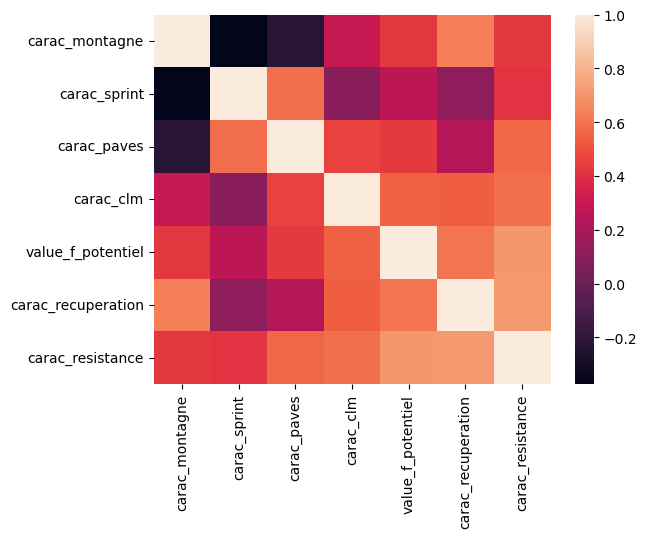

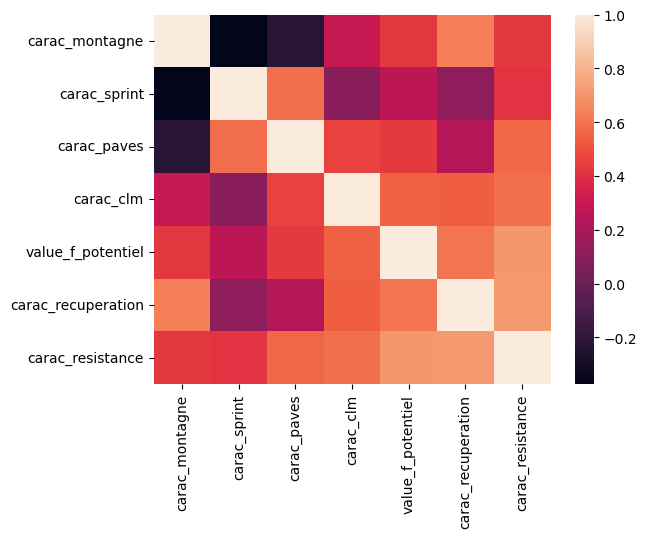

In [21]:
sns.heatmap(matrice_seg.corr());

#### 4.2 / ACP permettant la visualisation des corrélations et la réduction du nombre de dimensions

In [22]:
# Seuil modificable.
seuil = 0.75

# On initialise le classifieur PCA avec le nombre de variance que l'on souhaite garder.
pca = PCA(n_components = seuil, whiten = True, random_state=2016)

# ACP sur nos données
pca.fit(matrice_seg)

# On regarde combien de composantes sont nécessaires pour expliquer au minimum 75% de la variance, 
# et le pourcentage de variance expliquée par chaque variable 
pca.explained_variance_ratio_ 

# On transforme nos données avec l'ACP
pca_result = pca.transform(matrice_seg)
print(pca_result.shape)

# On sauvegarde les résultats dans un nouveau df.
PCAvar = pd.DataFrame(pca_result, columns=['PCA1','PCA2'])
PCAvar.head()

(908, 2)
(908, 2)


,PCA1,PCA2
0,-0.182577,-1.347771
1,1.888759,-0.489929
2,1.644013,-0.101618
3,1.963875,-0.217351
4,0.531529,0.944469


,PCA1,PCA2
0,-0.182577,-1.347771
1,1.888759,-0.489929
2,1.644013,-0.101618
3,1.963875,-0.217351
4,0.531529,0.944469


In [23]:
print (pca.explained_variance_)
print("\n")
print (pca.explained_variance_ratio_)
print("\n")
print (pca.explained_variance_ratio_.cumsum())

[76.98944861 68.80773218]


[0.41820478 0.3737619 ]


[0.41820478 0.79196668]
[76.98944861 68.80773218]


[0.41820478 0.3737619 ]


[0.41820478 0.79196668]


In [24]:
#Préparation des données pour affichage
dfpca = pd.DataFrame(data = pca.explained_variance_ratio_
             , columns = ['Variance Expliquée'])
dfpca.index.name = 'Composantes'
dfpca.reset_index(inplace=True)
dfpca['Composantes'] +=1

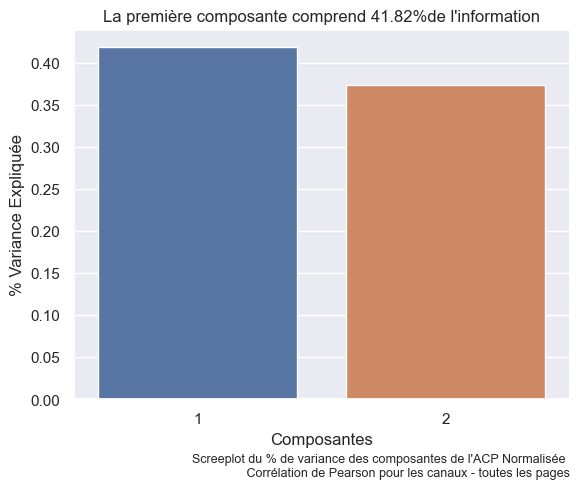

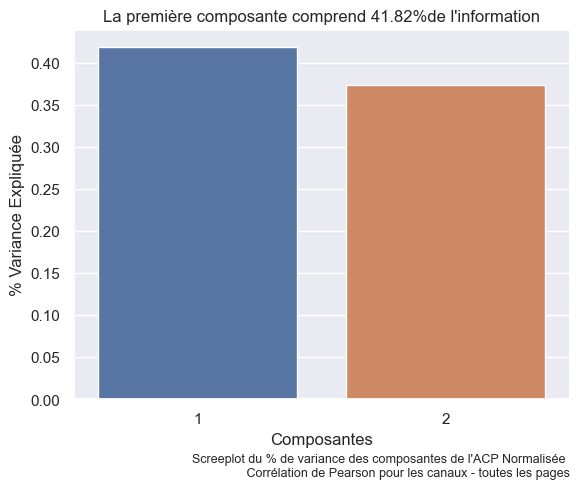

In [25]:
#Graphique Screeplot
sns.set()  #paramètres esthétiques ressemble à ggplot par défaut.
fig, ax = plt.subplots()  #un seul plot 
sns.barplot(x='Composantes', y= 'Variance Expliquée', data=dfpca )
ax.set(xlabel='Composantes', ylabel='% Variance Expliquée',
       title="La première composante comprend " + "{0:.2f}%".format(pca.explained_variance_ratio_[0]*100) + "de l'information")
fig.text(.9,-.05,"Screeplot du % de variance des composantes de l'ACP Normalisée \n Corrélation de Pearson pour les canaux - toutes les pages", fontsize=9, ha="right")
#plt.show()
fig.savefig("All-PCA-StandardScaler-Pearson-screeplot-channel.png", bbox_inches="tight", dpi=600)

In [26]:
type(pca_result)

numpy.ndarray

numpy.ndarray

In [27]:
pca_result

array([[-0.18257708, -1.3477712 ],
       [ 1.88875929, -0.48992904],
       [ 1.64401329, -0.10161817],
       ...,
       [-1.95090239, -0.07092644],
       [-1.98685937,  0.77998306],
       [-1.12851847,  0.36234124]])

array([[-0.18257708, -1.3477712 ],
       [ 1.88875929, -0.48992904],
       [ 1.64401329, -0.10161817],
       ...,
       [-1.95090239, -0.07092644],
       [-1.98685937,  0.77998306],
       [-1.12851847,  0.36234124]])

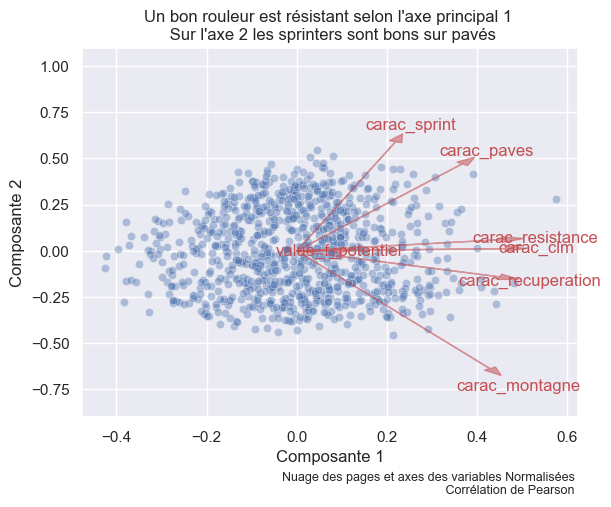

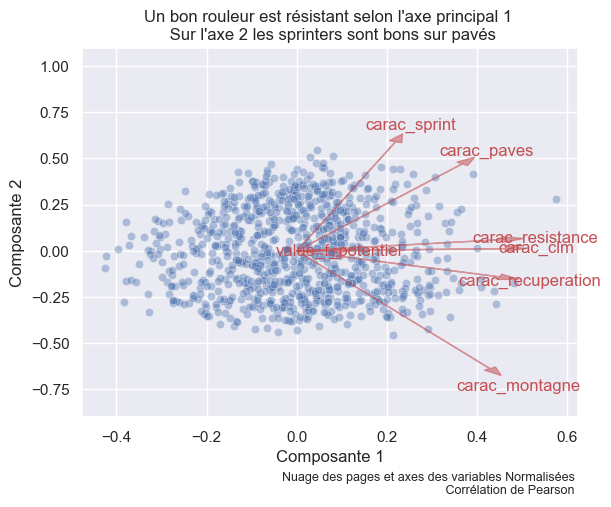

In [28]:
########################################################
# Nuage des individus et axes des variables            #
########################################################

# Ceci afin de faire ressortir les champs corrélés les uns des autres. 

labels=matrice_seg.columns.values
score= pca_result[:,0:2]
coeff=np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = score[:,0]
ys = score[:,1]  
#
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

#Graphique du nuage des pages et des axes des variables.
sns.set()  
fig, ax = plt.subplots()  #un seul plot 
sns.scatterplot(x=xs * scalex, y=ys * scaley, alpha=0.4)
for i in range(n):
    ax.arrow(0, 0, coeff[i,0]*1, coeff[i,1]*1,color = 'r',alpha = 0.5, head_width=.03)
    ax.text(coeff[i,0]*1.15, coeff[i,1]*1.15 , labels[i], color = 'r', ha = 'center', va = 'center')
ax.set(xlabel='Composante 1', ylabel='Composante 2',
       title="Un bon rouleur est résistant selon l'axe principal 1 \n Sur l'axe 2 les sprinters sont bons sur pavés")
ax.set_ylim((-0.9, 1.1))
fig.text(.9,-.05,"Nuage des pages et axes des variables Normalisées \n Corrélation de Pearson ", fontsize=9, ha="right")

#plt.show()
fig.savefig("ACP_cyclists.png", bbox_inches="tight", dpi=600)

### 4.3/ CAH

Ajout des coordonnées ACP aux tables inputs.

In [29]:
#matrice_seg = pd.concat([matrice_seg,PCAvar],axis=1)
#matrice_seg.head()

In [30]:
#matrice_seg_N = pd.concat([matrice_seg_N,PCAvar],axis=1)
#matrice_seg_N.head()

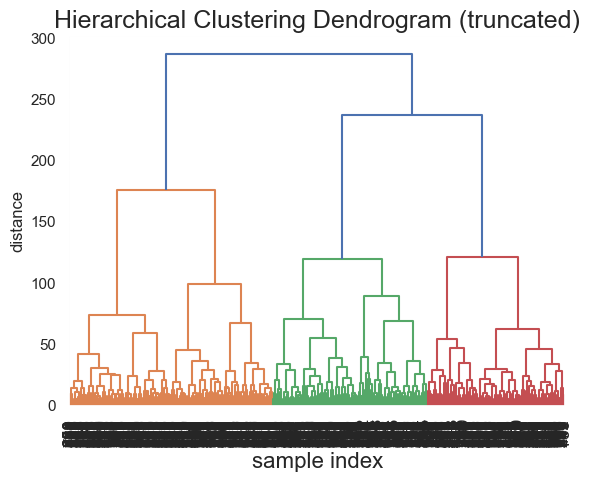

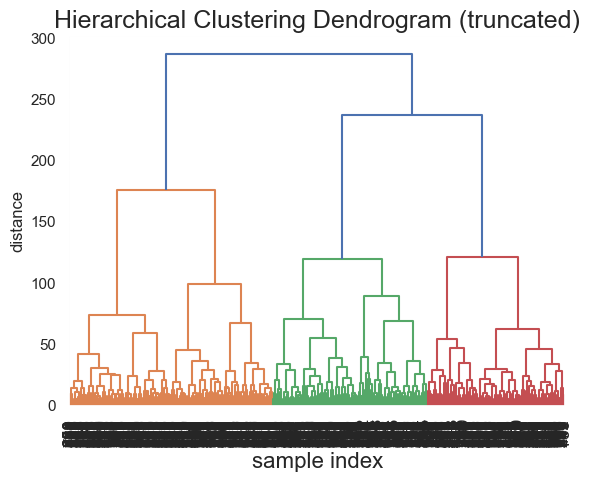

In [31]:
#générer la matrice des liens
Z = linkage(matrice_seg,method='ward',metric='euclidean')

plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=18)
plt.xlabel('sample index', fontsize=16)
plt.ylabel('distance', fontsize=12)

dendrogram(Z, p=16, truncate_mode = 'level', leaf_font_size=12, leaf_rotation=90.)
plt.show()

In [32]:
# Au vue de l'hétérogénéité des 908 coureurs, on part sur 12 segments distincts.
hac = AgglomerativeClustering(n_clusters = 12, affinity = 'euclidean', linkage = 'ward')

hac.fit(matrice_seg)

pd.DataFrame(hac.labels_, columns = ['Cluster'])

C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Cluster
0,0
1,7
2,7
3,4
4,8
...,...
903,11
904,5
905,11
906,11


,Cluster
0,0
1,7
2,7
3,4
4,8
...,...
903,11
904,5
905,11
906,11


On joint l'indicateur "Segment" à la base cyclistes.

In [33]:
cluster = pd.concat([cyclists_seg, pd.DataFrame(hac.labels_, columns = ['HAC'])], axis = 1)
#print(cluster.columns)
cluster.head()

,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,carac_descente,...,carac_endurance,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division,HAC
0,0,2,Zeits,Andrey,Astana Qazaqstan Team,3.5,66.38,69,73,66,...,66,66,71,73,72,1,2,9,GS1,0
1,1,3,Valverde,Alejandro,Movistar Team,5.5,73.08,70,77,75,...,75,76,73,81,70,130,14,1,GS1,7
2,2,4,Madouas,Valentin,Groupama - FDJ,5.5,72.38,74,75,74,...,75,77,70,78,73,2,2,1,GS1,7
3,4,16,Mollema,Bauke,Trek - Segafredo,5.5,73.69,73,75,67,...,77,74,73,78,79,17,11,4,GS1,4
4,5,17,Van Emden,Jos,Team Jumbo - Visma,4.0,69.15,76,58,70,...,67,69,69,68,69,13,2,10,GS1,8


,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,carac_descente,...,carac_endurance,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division,HAC
0,0,2,Zeits,Andrey,Astana Qazaqstan Team,3.5,66.38,69,73,66,...,66,66,71,73,72,1,2,9,GS1,0
1,1,3,Valverde,Alejandro,Movistar Team,5.5,73.08,70,77,75,...,75,76,73,81,70,130,14,1,GS1,7
2,2,4,Madouas,Valentin,Groupama - FDJ,5.5,72.38,74,75,74,...,75,77,70,78,73,2,2,1,GS1,7
3,4,16,Mollema,Bauke,Trek - Segafredo,5.5,73.69,73,75,67,...,77,74,73,78,79,17,11,4,GS1,4
4,5,17,Van Emden,Jos,Team Jumbo - Visma,4.0,69.15,76,58,70,...,67,69,69,68,69,13,2,10,GS1,8


### 5 / Caractéristiques techniques de chaque segment

On va désormais chercher à dresser le profil des 7 colonnes "caractéristiques" pour chacun des 12 segments afin de mieux apprécier cette classification et éventuellement nommer chacun des sous-ensembles.

In [34]:
clust1=cluster.groupby("HAC")["carac_montagne"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust=clust1.iloc[:,0:2]
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'montagne'})
clust

,HAC,count,montagne
0,0,158,72.531646
1,1,102,62.980392
2,2,83,68.072289
3,3,103,66.038835
4,4,93,75.989247
5,5,60,58.950000
6,6,98,58.010204
7,7,27,69.888889
8,8,49,63.102041
9,9,54,59.259259


,HAC,count,montagne
0,0,158,72.531646
1,1,102,62.980392
2,2,83,68.072289
3,3,103,66.038835
4,4,93,75.989247
5,5,60,58.950000
6,6,98,58.010204
7,7,27,69.888889
8,8,49,63.102041
9,9,54,59.259259


In [35]:
clust1=cluster.groupby("HAC")["carac_sprint"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'sprint'})
clust

,HAC,count,montagne,sprint
0,0,158,72.531646,62.278481
1,1,102,62.980392,69.990196
2,2,83,68.072289,57.698795
3,3,103,66.038835,61.281553
4,4,93,75.989247,62.526882
5,5,60,58.950000,62.650000
6,6,98,58.010204,70.908163
7,7,27,69.888889,69.740741
8,8,49,63.102041,60.734694
9,9,54,59.259259,76.314815


,HAC,count,montagne,sprint
0,0,158,72.531646,62.278481
1,1,102,62.980392,69.990196
2,2,83,68.072289,57.698795
3,3,103,66.038835,61.281553
4,4,93,75.989247,62.526882
5,5,60,58.950000,62.650000
6,6,98,58.010204,70.908163
7,7,27,69.888889,69.740741
8,8,49,63.102041,60.734694
9,9,54,59.259259,76.314815


In [36]:
clust1=cluster.groupby("HAC")["carac_paves"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'paves'})
clust

,HAC,count,montagne,sprint,paves
0,0,158,72.531646,62.278481,61.987342
1,1,102,62.980392,69.990196,72.617647
2,2,83,68.072289,57.698795,57.048193
3,3,103,66.038835,61.281553,61.359223
4,4,93,75.989247,62.526882,65.666667
5,5,60,58.950000,62.650000,66.016667
6,6,98,58.010204,70.908163,66.142857
7,7,27,69.888889,69.740741,76.037037
8,8,49,63.102041,60.734694,69.040816
9,9,54,59.259259,76.314815,70.944444


,HAC,count,montagne,sprint,paves
0,0,158,72.531646,62.278481,61.987342
1,1,102,62.980392,69.990196,72.617647
2,2,83,68.072289,57.698795,57.048193
3,3,103,66.038835,61.281553,61.359223
4,4,93,75.989247,62.526882,65.666667
5,5,60,58.950000,62.650000,66.016667
6,6,98,58.010204,70.908163,66.142857
7,7,27,69.888889,69.740741,76.037037
8,8,49,63.102041,60.734694,69.040816
9,9,54,59.259259,76.314815,70.944444


In [37]:
clust1=cluster.groupby("HAC")["carac_resistance"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'resistance'})
clust

,HAC,count,montagne,sprint,paves,resistance
0,0,158,72.531646,62.278481,61.987342,67.715190
1,1,102,62.980392,69.990196,72.617647,68.960784
2,2,83,68.072289,57.698795,57.048193,61.433735
3,3,103,66.038835,61.281553,61.359223,63.563107
4,4,93,75.989247,62.526882,65.666667,70.698925
5,5,60,58.950000,62.650000,66.016667,63.083333
6,6,98,58.010204,70.908163,66.142857,65.071429
7,7,27,69.888889,69.740741,76.037037,75.814815
8,8,49,63.102041,60.734694,69.040816,66.510204
9,9,54,59.259259,76.314815,70.944444,68.777778


,HAC,count,montagne,sprint,paves,resistance
0,0,158,72.531646,62.278481,61.987342,67.715190
1,1,102,62.980392,69.990196,72.617647,68.960784
2,2,83,68.072289,57.698795,57.048193,61.433735
3,3,103,66.038835,61.281553,61.359223,63.563107
4,4,93,75.989247,62.526882,65.666667,70.698925
5,5,60,58.950000,62.650000,66.016667,63.083333
6,6,98,58.010204,70.908163,66.142857,65.071429
7,7,27,69.888889,69.740741,76.037037,75.814815
8,8,49,63.102041,60.734694,69.040816,66.510204
9,9,54,59.259259,76.314815,70.944444,68.777778


In [38]:
clust1=cluster.groupby("HAC")["carac_clm"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'clm'})
clust

,HAC,count,montagne,sprint,paves,resistance,clm
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259


,HAC,count,montagne,sprint,paves,resistance,clm
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259


In [39]:
clust1=cluster.groupby("HAC")["carac_recuperation"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'recuperation'})
clust

,HAC,count,montagne,sprint,paves,resistance,clm,recuperation
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975,69.917722
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980,68.225490
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036,63.313253
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019,65.757282
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495,74.290323
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000,62.950000
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429,64.489796
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593,71.518519
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939,68.020408
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259,68.222222


,HAC,count,montagne,sprint,paves,resistance,clm,recuperation
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975,69.917722
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980,68.225490
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036,63.313253
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019,65.757282
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495,74.290323
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000,62.950000
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429,64.489796
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593,71.518519
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939,68.020408
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259,68.222222


In [40]:
clust1=cluster.groupby("HAC")["carac_moy"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'carac_moy'})
clust

,HAC,count,montagne,sprint,paves,resistance,clm,recuperation,carac_moy
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975,69.917722,67.957975
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980,68.225490,69.696569
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036,63.313253,62.615301
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019,65.757282,64.881845
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495,74.290323,71.254516
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000,62.950000,64.575667
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429,64.489796,65.940918
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593,71.518519,74.002963
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939,68.020408,67.625102
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259,68.222222,68.940741


,HAC,count,montagne,sprint,paves,resistance,clm,recuperation,carac_moy
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975,69.917722,67.957975
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980,68.225490,69.696569
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036,63.313253,62.615301
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019,65.757282,64.881845
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495,74.290323,71.254516
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000,62.950000,64.575667
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429,64.489796,65.940918
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593,71.518519,74.002963
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939,68.020408,67.625102
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259,68.222222,68.940741


In [41]:
clust1=cluster.groupby("HAC")["value_f_potentiel"].agg([pd.Series.count,pd.Series.max,pd.Series.min,pd.Series.mean]).reset_index()
clust1=clust1.iloc[:,4:]
clust= pd.concat([clust,clust1],axis=1)
clust=clust.rename(columns={'mean': 'potentiel'})
clust

,HAC,count,montagne,sprint,paves,resistance,clm,recuperation,carac_moy,potentiel
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975,69.917722,67.957975,4.044304
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980,68.225490,69.696569,4.186275
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036,63.313253,62.615301,3.126506
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019,65.757282,64.881845,3.281553
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495,74.290323,71.254516,4.903226
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000,62.950000,64.575667,3.116667
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429,64.489796,65.940918,3.454082
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593,71.518519,74.002963,5.166667
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939,68.020408,67.625102,3.897959
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259,68.222222,68.940741,4.435185


,HAC,count,montagne,sprint,paves,resistance,clm,recuperation,carac_moy,potentiel
0,0,158,72.531646,62.278481,61.987342,67.715190,64.537975,69.917722,67.957975,4.044304
1,1,102,62.980392,69.990196,72.617647,68.960784,66.950980,68.225490,69.696569,4.186275
2,2,83,68.072289,57.698795,57.048193,61.433735,58.759036,63.313253,62.615301,3.126506
3,3,103,66.038835,61.281553,61.359223,63.563107,62.466019,65.757282,64.881845,3.281553
4,4,93,75.989247,62.526882,65.666667,70.698925,72.978495,74.290323,71.254516,4.903226
5,5,60,58.950000,62.650000,66.016667,63.083333,63.850000,62.950000,64.575667,3.116667
6,6,98,58.010204,70.908163,66.142857,65.071429,62.071429,64.489796,65.940918,3.454082
7,7,27,69.888889,69.740741,76.037037,75.814815,73.592593,71.518519,74.002963,5.166667
8,8,49,63.102041,60.734694,69.040816,66.510204,70.346939,68.020408,67.625102,3.897959
9,9,54,59.259259,76.314815,70.944444,68.777778,63.259259,68.222222,68.940741,4.435185


On voit que la constitution de *12* segments fait ressortir **des populations** suffisamment **nombreuses** et **différentes** les unes des autres.

#### Echantillon de 3 coureurs par segment.

Ceci afin de disposer d'un pool de coureur de chaque segment et évaluer la cohérence de ceux-ci. Un coureur réputé pour gagner le tour de France (segment LEADERS) ne doit pas apparaître dans la citation de coureurs du segment EQUIPIERS.

In [42]:
pool0=cluster[cluster['HAC'] == 0].sort_values(by=["carac_montagne"],ascending=False).reset_index().iloc[:3,:]
pool1=cluster[cluster['HAC'] == 1].sort_values(by=["carac_sprint"],ascending=False).reset_index().iloc[:3,:]

pool2=cluster[cluster['HAC'] == 2].sort_values(by=["carac_moy"],ascending=False).reset_index().iloc[:3,:]
pool3=cluster[cluster['HAC'] == 3].sort_values(by=["carac_montagne"],ascending=False).reset_index().iloc[:3,:]

pool4=cluster[cluster['HAC'] == 4].sort_values(by=["carac_montagne"],ascending=False).reset_index().iloc[:3,:]
pool5=cluster[cluster['HAC'] == 5].sort_values(by=["carac_paves"],ascending=False).reset_index().iloc[:3,:]

pool6=cluster[cluster['HAC'] == 6].sort_values(by=["carac_sprint"],ascending=False).reset_index().iloc[:3,:]
pool7=cluster[cluster['HAC'] == 7].sort_values(by=["carac_paves"],ascending=False).reset_index().iloc[:3,:]

pool8=cluster[cluster['HAC'] == 8].sort_values(by=["carac_clm"],ascending=False).reset_index().iloc[:3,:]
pool9=cluster[cluster['HAC'] == 9].sort_values(by=["carac_sprint"],ascending=False).reset_index().iloc[:3,:]

pool10=cluster[cluster['HAC'] == 10].sort_values(by=["carac_moy"],ascending=False).reset_index().iloc[:3,:]
pool11=cluster[cluster['HAC'] == 11].sort_values(by=["carac_moy"],ascending=False).reset_index().iloc[:3,:]

 
pool=pd.concat([pool0,pool1,pool2,pool3,pool4,pool5,pool6,pool7,pool8,pool9,pool10,pool11],axis=0)

pool

,level_0,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,...,carac_endurance,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division,HAC
0,151,185,2543,Bardet,Romain,Team DSM,5.5,73.46,71,80,...,78,74,76,78,72,9,8,1,GS1,0
1,241,332,3357,Woods,Michael,Israël - Premier Tech,5.0,70.15,69,79,...,73,75,71,81,69,8,2,2,GS1,0
2,102,123,2074,Chaves,Esteban,EF Education-EasyPost,5.0,70.54,69,79,...,77,72,69,78,75,16,3,4,GS1,0
0,79,96,1947,Sagan,Peter,Team TotalEnergies,5.5,74.15,73,65,...,72,72,74,71,80,119,10,2,GS2,1
1,724,1435,7110,Girmay,Biniam,Intermarché-Wanty-Gobert Matériaux,5.5,72.00,76,65,...,72,74,71,76,71,5,0,0,GS1,1
2,148,182,2537,Colbrelli,Sonny,Bahrain Victorious,5.0,72.77,77,70,...,73,74,71,76,65,34,5,5,GS1,1
0,710,1414,7087,Buitrago,Santiago,Bahrain Victorious,4.0,67.23,68,76,...,69,69,66,75,70,0,0,0,GS1,2
1,149,183,2541,Elissonde,Kenny,Trek - Segafredo,4.0,67.00,66,75,...,67,66,71,73,74,2,2,3,GS1,2
2,696,1394,7064,Rubio,Einer,Movistar Team,5.0,66.69,65,76,...,70,67,70,74,72,0,0,2,GS1,2
0,774,1692,7383,Vandenabeele,Henri,Team DSM,5.0,65.38,68,72,...,66,65,65,73,61,0,0,0,GS1,3


,level_0,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,...,carac_endurance,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division,HAC
0,151,185,2543,Bardet,Romain,Team DSM,5.5,73.46,71,80,...,78,74,76,78,72,9,8,1,GS1,0
1,241,332,3357,Woods,Michael,Israël - Premier Tech,5.0,70.15,69,79,...,73,75,71,81,69,8,2,2,GS1,0
2,102,123,2074,Chaves,Esteban,EF Education-EasyPost,5.0,70.54,69,79,...,77,72,69,78,75,16,3,4,GS1,0
0,79,96,1947,Sagan,Peter,Team TotalEnergies,5.5,74.15,73,65,...,72,72,74,71,80,119,10,2,GS2,1
1,724,1435,7110,Girmay,Biniam,Intermarché-Wanty-Gobert Matériaux,5.5,72.00,76,65,...,72,74,71,76,71,5,0,0,GS1,1
2,148,182,2537,Colbrelli,Sonny,Bahrain Victorious,5.0,72.77,77,70,...,73,74,71,76,65,34,5,5,GS1,1
0,710,1414,7087,Buitrago,Santiago,Bahrain Victorious,4.0,67.23,68,76,...,69,69,66,75,70,0,0,0,GS1,2
1,149,183,2541,Elissonde,Kenny,Trek - Segafredo,4.0,67.00,66,75,...,67,66,71,73,74,2,2,3,GS1,2
2,696,1394,7064,Rubio,Einer,Movistar Team,5.0,66.69,65,76,...,70,67,70,74,72,0,0,2,GS1,2
0,774,1692,7383,Vandenabeele,Henri,Team DSM,5.0,65.38,68,72,...,66,65,65,73,61,0,0,0,GS1,3


#### Labellisation des 12 segments

In [43]:
hac_mapping = {
    0: ("🏔️", "Grimpeurs"),
    1: ("➡️", "Sprinters/Classics"),
    2: ("🚴", "Equipiers Grimpeurs"),
    3: ("🚴", "Equipiers"),
    4: ("👑", "Leaders de grands tours"),
    5: ("🚴", "Equipiers rouleurs"),
    6: ("🚴", "Equipiers sprinters"),
    7: ("🚧", "Classic-men"),  
    8: ("⌚", "Rouleurs"),
    9: ("💨", "Purs sprinters"),
    10: ("🥾", "Baroudeurs"),
    11: ("🚴‍♂️💧", "Porte-bidons"),  
}

cluster["HAC_label"] = cluster["HAC"].map(lambda x: f"{hac_mapping.get(x, ('❓', 'Inconnu'))[0]} {hac_mapping.get(x, ('❓', 'Inconnu'))[1]}")
cluster.head()

,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,carac_descente,...,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division,HAC,HAC_label
0,0,2,Zeits,Andrey,Astana Qazaqstan Team,3.5,66.38,69,73,66,...,66,71,73,72,1,2,9,GS1,0,🏔️ Grimpeurs
1,1,3,Valverde,Alejandro,Movistar Team,5.5,73.08,70,77,75,...,76,73,81,70,130,14,1,GS1,7,🚧 Classic-men
2,2,4,Madouas,Valentin,Groupama - FDJ,5.5,72.38,74,75,74,...,77,70,78,73,2,2,1,GS1,7,🚧 Classic-men
3,4,16,Mollema,Bauke,Trek - Segafredo,5.5,73.69,73,75,67,...,74,73,78,79,17,11,4,GS1,4,👑 Leaders de grands tours
4,5,17,Van Emden,Jos,Team Jumbo - Visma,4.0,69.15,76,58,70,...,69,69,68,69,13,2,10,GS1,8,⌚ Rouleurs


,index,IDcyclist,Nom,Prenom,ID_team,value_f_potentiel,carac_moy,carac_plaine,carac_montagne,carac_descente,...,carac_resistance,carac_recuperation,carac_vallon,carac_baroudeur,gene_i_nb_victory,gene_i_nb_tdf,gene_i_nb_giro,ID_division,HAC,HAC_label
0,0,2,Zeits,Andrey,Astana Qazaqstan Team,3.5,66.38,69,73,66,...,66,71,73,72,1,2,9,GS1,0,🏔️ Grimpeurs
1,1,3,Valverde,Alejandro,Movistar Team,5.5,73.08,70,77,75,...,76,73,81,70,130,14,1,GS1,7,🚧 Classic-men
2,2,4,Madouas,Valentin,Groupama - FDJ,5.5,72.38,74,75,74,...,77,70,78,73,2,2,1,GS1,7,🚧 Classic-men
3,4,16,Mollema,Bauke,Trek - Segafredo,5.5,73.69,73,75,67,...,74,73,78,79,17,11,4,GS1,4,👑 Leaders de grands tours
4,5,17,Van Emden,Jos,Team Jumbo - Visma,4.0,69.15,76,58,70,...,69,69,68,69,13,2,10,GS1,8,⌚ Rouleurs


### 6 / Exports

In [44]:
# Exports des livrables.
results_path = results + "/" + str(DTJ) + "_classification_cyclists.xlsx"

with pd.ExcelWriter(results_path, engine="xlsxwriter") as writer:
    cluster.to_excel(writer, sheet_name="base")
    clust.to_excel(writer, sheet_name="tab_recap")
    pool.to_excel(writer, sheet_name="pool")